# U.S. Medical Insurance Costs

#### Intro
This is a portfolio project from Codecademy which aims to sort and analyse data about U.S. medical insurance costs.

Pandas and matplotlib are used to analyse the data.

In [196]:
import pandas as pd
import matplotlib as plt
import seaborn as sn

#### Data Basics
This first section shall give an overview of the data.

In [17]:
medical_insurance_df = pd.read_csv('insurance.csv')
medical_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
medical_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It can be seen that there are multiple columns to describe the person and combine those with the related cost of medical insuarnce. 
There are no columns with missing values.

In [103]:
medical_insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distributions of basic data
The next section shall give an overview of various distributions of the data.
- Region distribution
- Age distribution
- Cost distribution

Text(0, 0.5, 'Count')

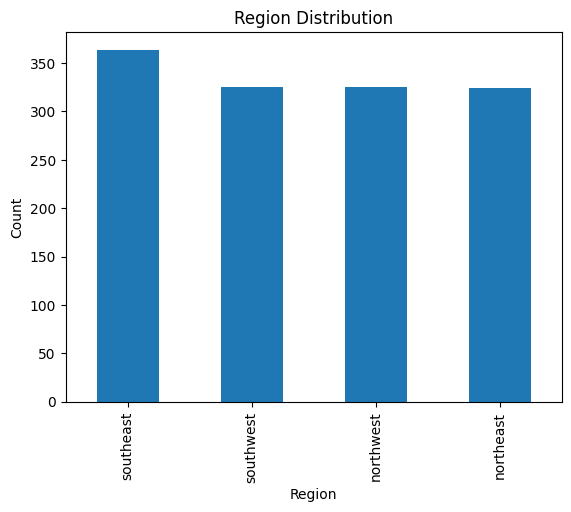

In [138]:
# Region distribution of patients
region_distribution = medical_insurance_df['region'].value_counts()
region_distribution.plot(kind='bar')
# Axes labels
plt.pyplot.title('Region Distribution')
plt.pyplot.xlabel('Region')
plt.pyplot.ylabel('Count')


Text(0.5, 1.0, 'Insurance Charges Distribution')

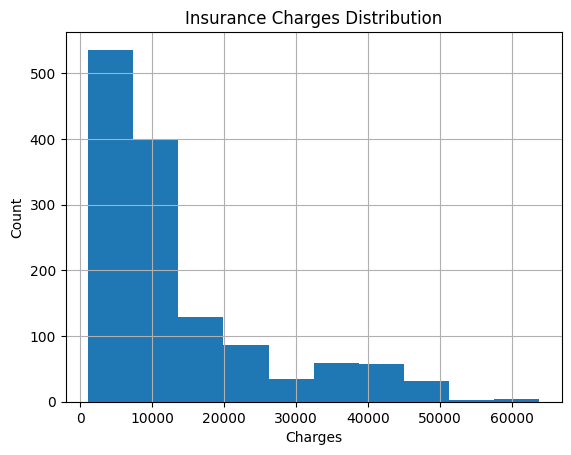

In [101]:
# Cost distribution of patients
cost_distribution = medical_insurance_df['charges'].hist()
# Axes labels
plt.pyplot.xlabel('Charges')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Insurance Charges Distribution')

Text(0.5, 1.0, 'Age Distribution')

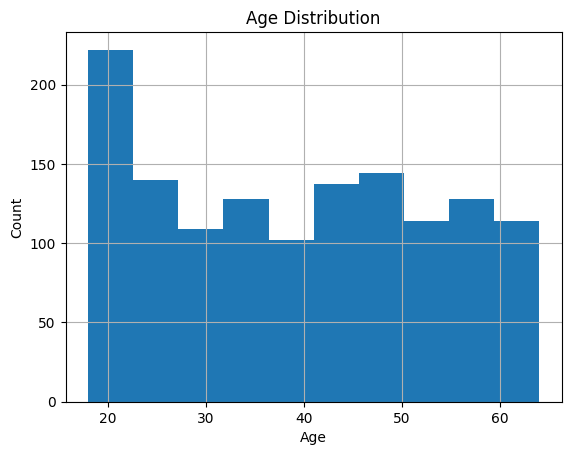

In [99]:
# Age distribution of patients
age_distribution = medical_insurance_df['age'].hist()
# Axes labels
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Age Distribution')

### Average and median of basic data
This section shall give an overview of the average and median of the insurance data.
Such as:
- Average and median age of patients
- Average cost and median cost of medical insurance

In [18]:
# Average and median age of patiens
mean = medical_insurance_df['age'].mean()
median = medical_insurance_df['age'].median()
print(mean, median)

39.20702541106129 39.0


In [25]:
# Average and median age of patients with at least one child
patiens_with_children = medical_insurance_df[medical_insurance_df['children'] >= 1]
mean_age_patients_with_children = patiens_with_children['age'].mean()
median_age_patients_with_children = patiens_with_children['age'].median()
print(mean_age_patients_with_children, median_age_patients_with_children)

39.78010471204188 40.0


In [26]:
# Average and median age of patients with no children
patiens_without_children = medical_insurance_df[medical_insurance_df['children'] == 0]
mean_age_patients_without_children = patiens_without_children['age'].mean()
median_age_patients_without_children = patiens_without_children['age'].median()
print(mean_age_patients_without_children, median_age_patients_without_children)

38.444250871080136 36.0


In [20]:
# Average cost and median cost of medical insurance
mean_cost = medical_insurance_df['charges'].mean()
median_cost = medical_insurance_df['charges'].median()
print(mean_cost, median_cost)

13270.422265141257 9382.033


In general it can be seen that the median and average of age are very close to each other. This shows that there are no outliers.
The insurance cost tells a different story. The difference of median and average are showing that there are outliners in the data.
This can also be seen by the insurance cost plot from the beginning.

### Smokers and non-smokers
This section shall give an overview of the smokers and non-smokers differences in the data.

In [22]:
# Cost difference between smokers and non-smokers
smokers = medical_insurance_df[medical_insurance_df['smoker'] == 'yes']['charges']
non_smokers = medical_insurance_df[medical_insurance_df['smoker'] == 'no']['charges']
smokers_cost_difference = smokers.mean() - non_smokers.mean()
print(smokers_cost_difference, non_smokers.mean(), smokers.mean())

23615.963533676637 8434.268297856204 32050.23183153284


It can be seen that the average cost of non-smokers is lower than the average cost of smokers. This might be because the risk of payment for the insurance companies is lower for non-smokers and vice-versa.

In [24]:
# Average and median Age of smokers and non-smokers
smokers_age = medical_insurance_df[medical_insurance_df['smoker'] == 'yes']['age']
mean_age_smokers = smokers_age.mean()
median_age_smokers = smokers_age.median()
non_smokers_age = medical_insurance_df[medical_insurance_df['smoker'] == 'no']['age']
mean_age_none_smokers = non_smokers_age.mean()
median_age_none_smokers = non_smokers_age.median()
mean_age_difference = mean_age_smokers - mean_age_none_smokers
print(mean_age_difference, median_age_smokers, median_age_none_smokers)

-0.8707398057186779 38.0 40.0


Interestingly there is no huge average age difference of smokers and non-smokers, altough there is a spike in the data for younger persons - around 20 years old. This can be seen in the graph plotted below.

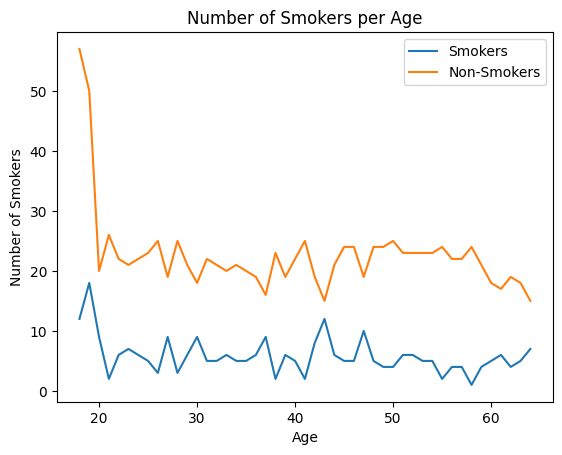

In [156]:
# Smoker per age
smoker_df = medical_insurance_df[medical_insurance_df['smoker'] == 'yes']
non_smoker_df = medical_insurance_df[medical_insurance_df['smoker'] == 'no']
smoker_per_age = smoker_df.groupby('age')['smoker'].count()
non_smokers_per_age = non_smoker_df.groupby('age')['smoker'].count()
# Plot 
smoker_per_age.plot()
non_smokers_per_age.plot()
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Number of Smokers')
plt.pyplot.title('Number of Smokers per Age')
plt.pyplot.legend(['Smokers', 'Non-Smokers'])


### Correlation of basic data
This section shall give an overview of the correlation of the basic data. The first one is showing a correlation of the Mean BMI and the age of persons.

Text(0.5, 1.0, 'Mean BMI and Age')

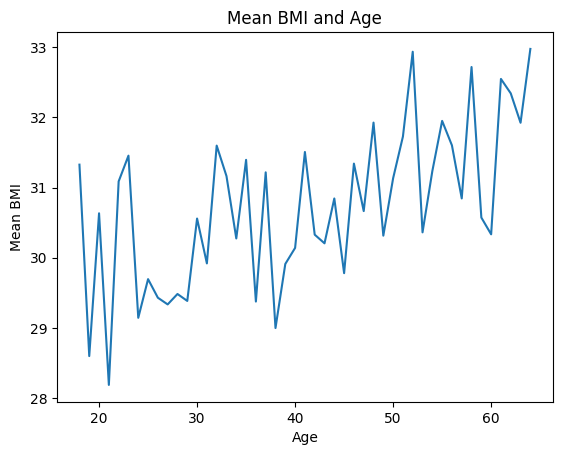

In [158]:
# BMI age plot
bmi_age = medical_insurance_df.groupby('age')['bmi'].mean()
bmi_age.plot()
#axes labels
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Mean BMI')
plt.pyplot.title('Mean BMI and Age')

From the figure above it can be seen that there is a positive correlation between the age and the BMI. This is illustrated by the correlation calculation over the entire data seen below.

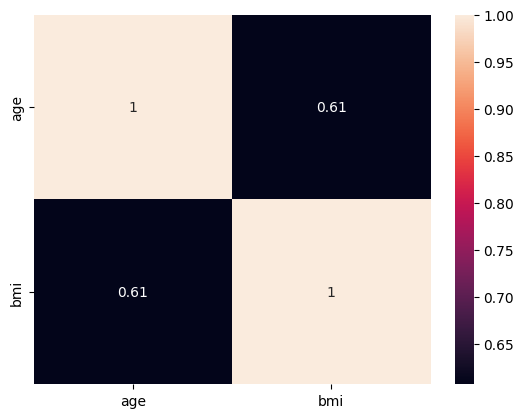

In [200]:
# Correllation between bmi and age
bmi_age = medical_insurance_df.groupby('age')[['age', 'bmi']].mean()
bmi_age_correllation = bmi_age.corr()

sn.heatmap(bmi_age_correllation, annot=True)
plt.pyplot.show()


Although BMI appears to increase with age, according to the following plot, cost and BMI appear to be only slightly correlated.

Text(0.5, 1.0, 'Mean BMI and Insurance Cost')

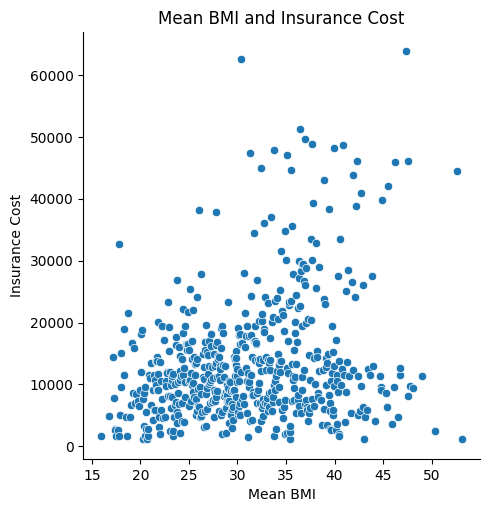

In [202]:
# bmi insurance scatter plot
bmi_insurance_cost = medical_insurance_df.groupby('bmi')['charges'].mean()
bmi_insurance_cost_df = pd.DataFrame({'bmi': bmi_insurance_cost.index, 'charges': bmi_insurance_cost.values})

sn.relplot(data=bmi_insurance_cost_df, x="bmi", y="charges")
#axes labels
plt.pyplot.xlabel('Mean BMI')
plt.pyplot.ylabel('Insurance Cost')
plt.pyplot.title('Mean BMI and Insurance Cost')

              bmi   charges
bmi      1.000000  0.266892
charges  0.266892  1.000000


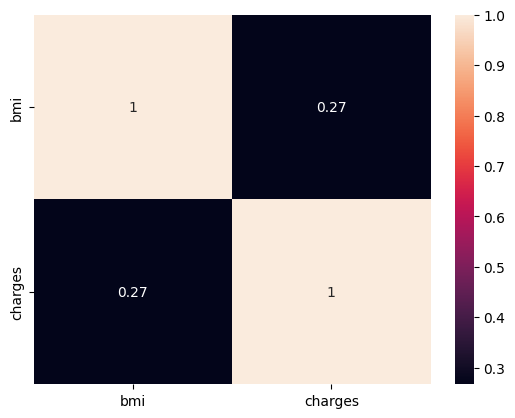

In [199]:
# Correllation between bmi and insurance cost
bmi_cost_correllation = bmi_insurance_cost_df.corr()
print(bmi_cost_correllation)

sn.heatmap(bmi_cost_correllation, annot=True)
plt.pyplot.show()

However, age and insurance cost show a strong positive correlation, as indicated by the plot and the correlation matrix. 
This is probably due to rising costs for insurers with increasing age of the insured.

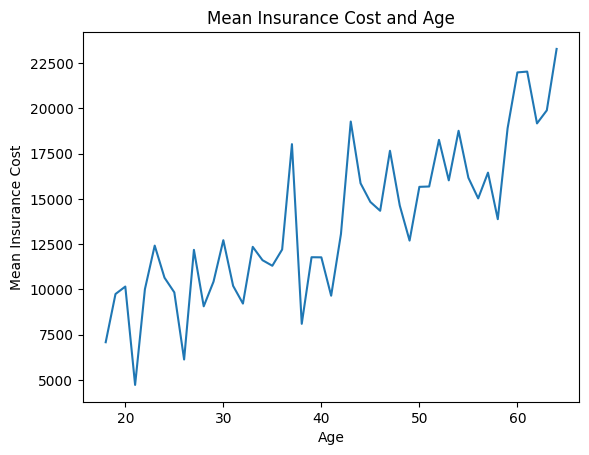

In [46]:
# Insurance cost and age plot
insurance_cost_age = medical_insurance_df.groupby('age')['charges'].mean()
insurance_cost_age.plot()
#axes labels
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Mean Insurance Cost')
plt.pyplot.title('Mean Insurance Cost and Age')


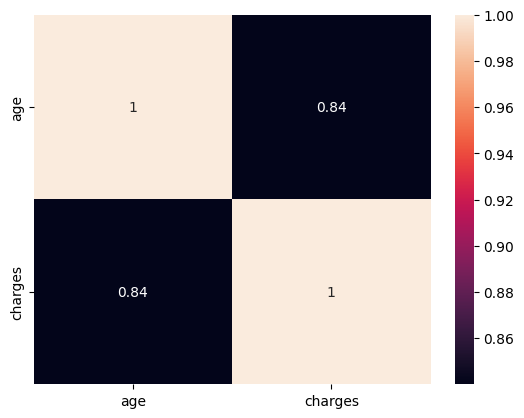

In [198]:
# Correllation between age and insurance cost
age_insurance_cost = medical_insurance_df.groupby('age')[['age', 'charges']].mean()
age_insurance_cost_correllation = age_insurance_cost.corr()

sn.heatmap(age_insurance_cost_correllation, annot=True)
plt.pyplot.show()